# Problem 1

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random as rd
%matplotlib inline
np.seterr(invalid='ignore', over='ignore')

{'divide': 'warn', 'over': 'warn', 'under': 'ignore', 'invalid': 'warn'}

In [2]:
N, p = 30, 20
np.random.seed(0)
X = np.random.randn(N, p)
Y = 2 * np.random.randint(2, size = N) - 1

Minimizer : [-0.48651935  1.23818473  0.41953234  4.96438239 -1.58543155 -0.91604375
 -4.6043269  -2.67397853  1.16083962  2.06781531  4.87451857 -7.32035519
 -0.31449899 -2.10115613  4.67614609  5.37479007 -4.47990975  0.67006012
 -0.76432097 -7.14086801]


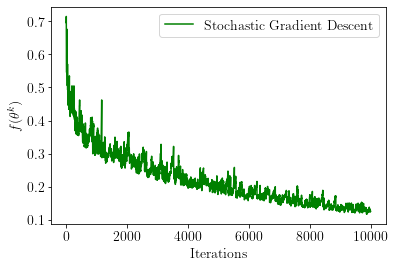

In [3]:
theta = np.zeros(p)
alpha = 0.1

K = 10000
f_val = []
for _ in range(K):
    ind = np.random.randint(N)
    theta -= alpha * (-Y[ind] * X[ind, :]) * np.exp(-Y[ind] * X[ind, :]@theta) / (1 + np.exp(-Y[ind] * X[ind, :]@theta))
    f_val.append(1 / N * sum([np.log(1 + np.exp(-Y[i] * X[i, :]@theta)) for i in range(N)]))

print("Minimizer :", theta)

plt.rc('text', usetex=True)
plt.rc('font', family='serif')
plt.rc('font', size = 14)
plt.plot(range(K), f_val, color = "green", label = "Stochastic Gradient Descent")
plt.xlabel('Iterations')
plt.ylabel(r'$f(\theta^k)$')
plt.legend()
plt.show()

The minimizer value is of the above.

# Problem 2

In [4]:
N, p = 30, 20
np.random.seed(0)
X = np.random.randn(N, p)
Y = 2 * np.random.randint(2, size = N) - 1

Minimizer : [ 0.04245915  0.02304598 -0.37121936  0.17323276 -0.05328655 -0.16701866
 -0.28764165 -0.24306239  0.33406482 -0.11305208  0.07719667 -0.1188748
  0.1277413  -0.23376922  0.24730886  0.26902977 -0.37221256 -0.09283627
 -0.08036682 -0.45411963]
Non-Dfferentiable Point Encounters : 0


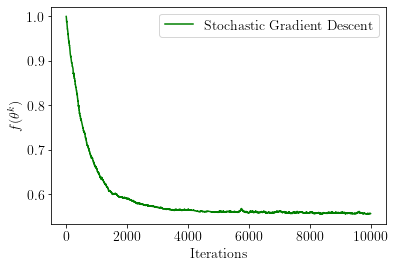

In [5]:
theta = np.zeros(p)
alpha = 0.001
lb = 0.1

K = 10000
f_val = []
non_diff_count = 0
for _ in range(K):
    if Y[ind] * X[ind, :]@theta == 1 : non_diff_count += 1
    ind = np.random.randint(N)
    theta -= alpha * ((-Y[ind] * X[ind, :]) + 2 * lb * theta) if Y[ind] * X[ind, :]@theta < 1 else alpha * 2 * lb * theta
    f_val.append(1 / N * sum([max(0, 1 - Y[i] * X[i, :]@theta) + lb * theta.T@theta for i in range(N)]))

print("Minimizer :", theta)
print("Non-Dfferentiable Point Encounters :", non_diff_count)

plt.rc('text', usetex=True)
plt.rc('font', family='serif')
plt.rc('font', size = 14)
plt.plot(range(K), f_val, color = "green", label = "Stochastic Gradient Descent")
plt.xlabel('Iterations')
plt.ylabel(r'$f(\theta^k)$')
plt.legend()
plt.show()

The minimizer value is of the above, and the process didn't encounter a point of non-differentiability.

# Problem 3

In [6]:
N = 30
np.random.seed(0)
X = np.random.randn(2, N)
y = np.sign(X[0, :]**2 + X[1, :]**2 - 0.7)
theta = 0.5
c, s = np.cos(theta), np.sin(theta)
X = np.array([[c, -s], [s, c]])@X
X = X + np.array([[1], [1]])

Simply plotting the labeled points by their labels results in the following.

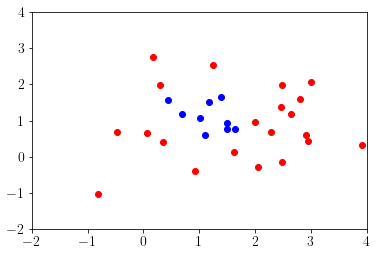

In [7]:
plt.rc('text', usetex=True)
plt.rc('font', family='serif')
plt.rc('font', size = 14)
plt.xlim(-2, 4)
plt.ylim(-2,4)
for i in range(N):
    plt.scatter(X[0, i], X[1, i], color = "red" if y[i] == 1 else "blue")
plt.show()

The red points are ones labeled $y = 1$, and the blue points are those labeled $y = -1$.
The plot simply shows that the data is not linearly separable in $\mathbb{R}^2$.

The given transformation can be applied as the following.

In [8]:
def phi(u, v):
    return np.array([1, u, u**2, v, v**2])

In [9]:
X_transformed = np.array([phi(X[0, i], X[1, i]) for i in range(N)]).T

Now apply logistic regression via SGD.
We are targeting the minimization
$$\underset{a \in \mathbb{R}^5, b \in \mathbb{R}}{\text{minimize}} \frac{1}{N}\sum_{i=1}^{N}\log\left(1 + \exp\left(-Y_{i}\left(a^\intercal X_i + b\right)\right)\right)$$
and we can simplify this as
$$\underset{\theta \in \mathbb{R}^5}{\text{minimize}} \frac{1}{N}\sum_{i=1}^{N}\log\left(1 + \exp\left(-Y_{i}X_{i}^\intercal\theta\right)\right).$$
As a result we are executing SGD in $\mathbb{R}^5$.

Minimizer : [  6.7173994  -10.32495424   4.9762752   -8.64245319   3.64384716]


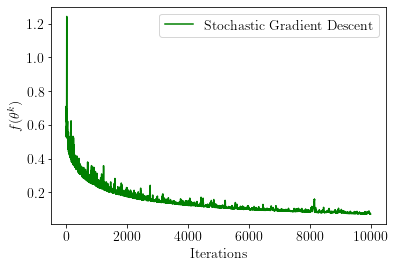

In [10]:
p = 5
theta = np.zeros(p)
alpha = 0.1

K = 10000
f_val = []
for _ in range(K):
    ind = np.random.randint(N)
    theta -= alpha * (-y[ind] * X_transformed[:, ind]) * np.exp(-y[ind] * X_transformed[:, ind]@theta) / (1 + np.exp(-y[ind] * X_transformed[:, ind]@theta))
    f_val.append(1 / N * sum([np.log(1 + np.exp(-y[i] * X_transformed[:, i]@theta)) for i in range(N)]))

print("Minimizer :", theta)

plt.rc('text', usetex=True)
plt.rc('font', family='serif')
plt.rc('font', size = 14)
plt.plot(range(K), f_val, color = "green", label = "Stochastic Gradient Descent")
plt.xlabel('Iterations')
plt.ylabel(r'$f(\theta^k)$')
plt.legend()
plt.show()

The minimizer value is of the above, and we can visualize the decision boundary in $\mathbb{R}^2$.

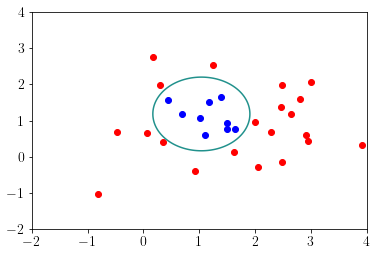

In [11]:
xx = np.linspace(-2, 4, 1024)
yy = np.linspace(-2, 4, 1024)
xx, yy = np.meshgrid(xx, yy)
Z = theta[0] + (theta[1] * xx + theta[2] * xx**2) + (theta[3] * yy + theta[4] * yy**2)
plt.contour(xx, yy, Z, 0)

plt.rc('text', usetex=True)
plt.rc('font', family='serif')
plt.rc('font', size = 14)
for i in range(N):
    plt.scatter(X[0, i], X[1, i], color = "red" if y[i] == 1 else "blue")
plt.show()

# Problem 7

In [12]:
def f_true(x) :
    return (x-2)*np.cos(x*4)

def sigmoid(x) :
    return 1 / (1 + np.exp(-x))

def sigmoid_prime(x) :
    return sigmoid(x) * (1 - sigmoid(x))

In [13]:
K = 10000
alpha = 0.007
N, p = 30, 50
np.random.seed(0)
a0 = np.random.normal(loc = 0.0, scale = 4.0, size = p)
b0 = np.random.normal(loc = 0.0, scale = 4.0, size = p)
u0 = np.random.normal(loc = 0, scale = 0.05, size = p)
theta = np.concatenate((a0,b0,u0))

X = np.random.normal(loc = 0.0, scale = 1.0, size = N)
Y = f_true(X)

In [14]:
def f_th(theta, x) :
    return np.sum(theta[2*p : 3*p] * sigmoid(theta[0 : p] * np.reshape(x,(-1,1)) + theta[p : 2*p]), axis=1)

def diff_f_th(theta, x) :
    partial_f_u = sigmoid(theta[0 : p] * x + theta[p : 2*p])
    partial_f_b = np.diag(sigmoid_prime(theta[0 : p] * x + theta[p : 2*p]))@theta[2*p : 3*p]
    partial_f_a = np.diag(sigmoid_prime(theta[0 : p] * x + theta[p : 2*p]))@theta[2*p : 3*p] * x
    return np.concatenate((partial_f_a, partial_f_b, partial_f_u), axis=None)

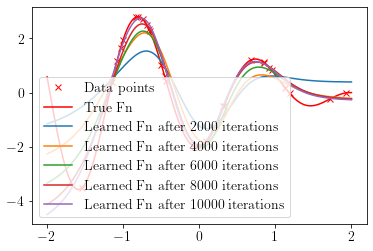

In [15]:
xx = np.linspace(-2,2,1024)
plt.plot(X,f_true(X),'rx',label='Data points')
plt.plot(xx,f_true(xx),'r',label='True Fn')

for k in range(K) :
    ind = np.random.randint(N)
    theta -= alpha * (f_th(theta, X[ind]) - Y[ind]) * diff_f_th(theta, X[ind])
    if (k+1)%2000 == 0 :
        plt.plot(xx, f_th(theta, xx), label=f'Learned Fn after {k+1} iterations')

plt.legend()
plt.show()